In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression

In [316]:
dataset = np.genfromtxt('data.csv', delimiter = ",")
df_data = pd.DataFrame(dataset)
df_data.corr()


,0,1,2
0,1.000000,0.061353,0.000838
1,0.061353,1.000000,0.068621
2,0.000838,0.068621,1.000000


In [317]:
dataset = dataset[~np.isnan(dataset).any(axis=1)]
dataset = dataset[~np.isinf(dataset).any(axis=1)]

In [318]:
dataset = dataset[:, [0,1,1]]

In [319]:
random.shuffle(dataset)
split = int(0.2 * len(dataset))
train_data = dataset[split:]
test_data = dataset[:split]

In [320]:
def calculate_euclidean_distance(training_features, query_features):
    return np.sqrt(np.sum(np.square(query_features-training_features), axis=1))

In [321]:
def predict(train_data, test_data, k):
    distances = calculate_euclidean_distance(train_data[:, 0:-1], test_data[0:-1])

    indices = np.argsort(distances)
    predicted_value = np.mean(train_data[indices[0:k], -1])

    return predicted_value

In [322]:
def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    
    r2 = 1 - (sum_squared_residuals / sum_squares)
    
    return r2

In [323]:
def count_errors(actual_target_values, predicted_target_values, threshold):
    errors = np.abs(predicted_target_values - actual_target_values) > threshold
    return np.sum(errors)

In [324]:
k = [1,3,5,7,9]
threshold = 0.1
all_predictions = {}

for kn in k:
    predictions = []
    for i in range(len(test_data)):
        predicted_value = predict(train_data, test_data[i], kn)
        predictions.append(predicted_value)

    all_predictions[kn] = predictions
    r2_score = calculate_r2(test_data[:, -1], np.array(predictions))
    number_of_errors = count_errors(test_data[:, -1], predictions, threshold)

    print(f"R2 score with k={kn} is :", r2_score)
    print(f"Number of Error with k={kn} is :", number_of_errors ,"out of", len(test_data), "data", '\n')

R2 score with k=141 is : 0.5197914685735563
Number of Error with k=141 is : 4095 out of 4104 data 

R2 score with k=143 is : 0.5177612226030056
Number of Error with k=143 is : 4101 out of 4104 data 

R2 score with k=145 is : 0.5153212058921861
Number of Error with k=145 is : 4102 out of 4104 data 

R2 score with k=147 is : 0.5133754776914911
Number of Error with k=147 is : 4101 out of 4104 data 

R2 score with k=149 is : 0.5121146179948719
Number of Error with k=149 is : 4093 out of 4104 data 



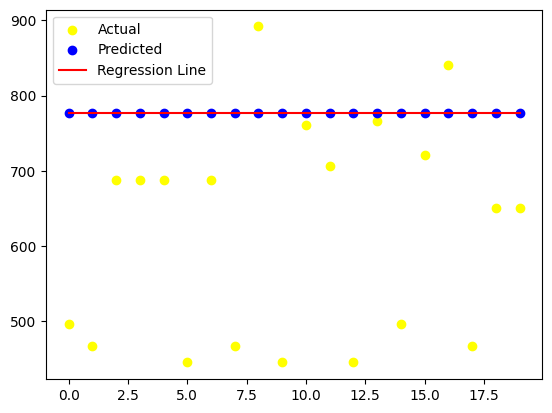

In [325]:
plt.scatter(np.arange(20), test_data[:20, -1], color='yellow', label='Actual')
plt.scatter(np.arange(20), predictions[:20], color='blue', label='Predicted')

model = LinearRegression()
model.fit(np.arange(20).reshape(-1, 1), predictions[:20])
regression_line = model.predict(np.arange(20).reshape(-1, 1))

plt.plot(np.arange(20), regression_line, color='red', label='Regression Line')
plt.legend()
plt.show()

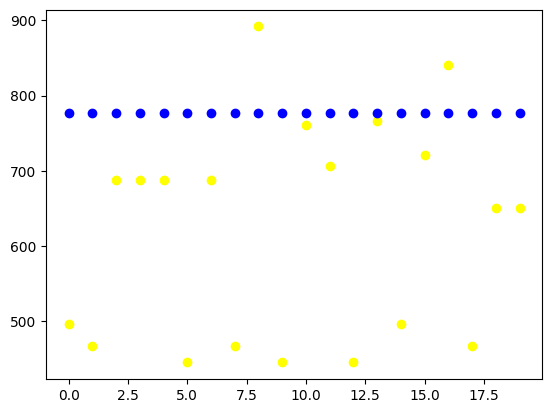

In [326]:
plt.scatter(np.arange(20), test_data[0:20, -1], color= 'yellow')
plt.scatter(np.arange(20), predictions[0:20], color= 'blue')

C:\Users\Zaidan\AppData\Local\Temp\ipykernel_2836\2004567744.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


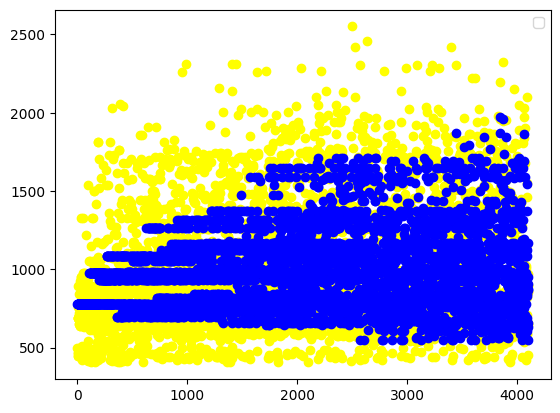

In [327]:
plt.scatter(np.arange(len(test_data)), test_data[:, -1], color= 'yellow')
plt.scatter(np.arange(len(test_data)), predictions, color= 'blue')
plt.legend()
plt.show()